# Flowers Images classification with TensorFlow Lite Model Maker


In [ ]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 642 kB 33.8 MB/s 
     |████████████████████████████████| 1.1 MB 53.3 MB/s 
     |████████████████████████████████| 3.4 MB 50.4 MB/s 
     |████████████████████████████████| 237 kB 73.0 MB/s 
     |████████████████████████████████| 840 kB 57.1 MB/s 
     |████████████████████████████████| 77 kB 6.4 MB/s 
     |████████████████████████████████| 596 kB 57.9 MB/s 
     |████████████████████████████████| 6.4 MB 55.2 MB/s 
     |████████████████████████████████| 10.9 MB 60.9 MB/s 
     |████████████████████████████████| 87 kB 6.0 MB/s 
     |████████████████████████████████| 42.5 MB 87.2 MB/s 
     |████████████████████████████████| 1.2 MB 57.6 MB/s 
     |████████████████████████████████| 120 kB 77.1 MB/s 
     |████████████████████████████████| 25.3 MB 1.5 MB/s 
     |████████████████████████████████| 352 kB 68.9 MB/s 
     |████████████████████████████████| 99 kB 11.6 MB/s 
     |████████████████████████████████| 47.8 MB 1.2 MB/s 
     |███████████

Import the required packages.

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

## Simple End-to-End Example

### Get the data path

Let's get some images to play with this simple end-to-end example. Hundreds of images is a good start for Model Maker while more data could achieve better accuracy.

In [5]:
!wget -N 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
import tarfile
file = tarfile.open('flower_photos.tgz')
file.extractall('./')
file.close()

--2022-06-07 07:22:09--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   133MB/s    in 1.6s    

2022-06-07 07:22:11 (133 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [14]:
#image_path='/content/spiders/train'
data = DataLoader.from_folder(image_path)


INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


In [6]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


In [7]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


103/103 [==============================] - 26s 137ms/step - loss: 0.8668 - accuracy: 0.7655
Epoch 2/5
103/103 [==============================] - 13s 130ms/step - loss: 0.6655 - accuracy: 0.8899
Epoch 3/5
103/103 [==============================] - 13s 128ms/step - loss: 0.6333 - accuracy: 0.9081
Epoch 4/5
103/103 [==============================] - 13s 129ms/step - loss: 0.6145 - accuracy: 0.9199
Epoch 5/5
103/103 [==============================] - 13s 130ms/step - loss: 0.5954 - accuracy: 0.9308


In [8]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 5s 156ms/step - loss: 0.5747 - accuracy: 0.9319


In [10]:
model.export(export_dir='/content/model16', export_format=ExportFormat.LABEL)
config = QuantizationConfig.for_float16()
model.export(export_dir='/content/model16', tflite_filename='model_flowers.tflite', quantization_config=config)

INFO:tensorflow:Saving labels in /content/model16/labels.txt


INFO:tensorflow:Saving labels in /content/model16/labels.txt


INFO:tensorflow:Assets written to: /tmp/tmp6cwssc6v/assets


INFO:tensorflow:Assets written to: /tmp/tmp6cwssc6v/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp_bslbuvq/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp_bslbuvq/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/model16/model_flowers.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/model16/model_flowers.tflite


In [ ]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Show 25 image examples with labels.

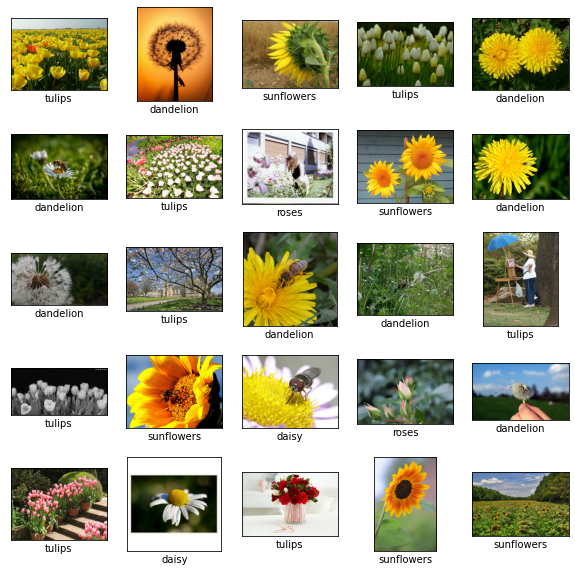

In [11]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_data)

*We* could plot the predicted results in 100 test images. Predicted labels with red color are the wrong predicted results while others are correct.

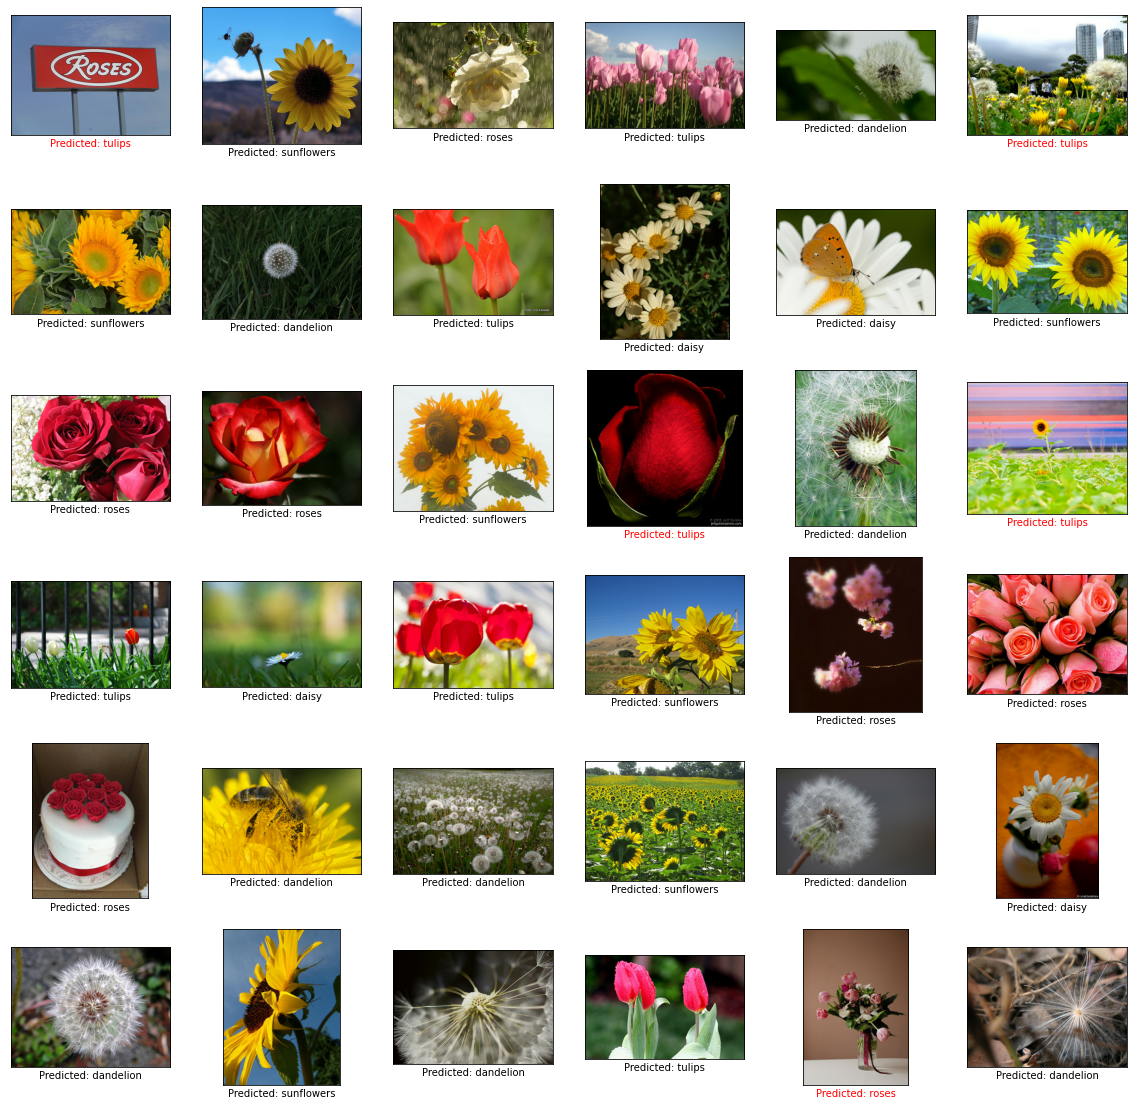

In [13]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(36)):
  ax = plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()